In [118]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

In [119]:
#Loading Data
df = pd.read_csv('rfm_data.csv')
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [120]:
#Checking NUll Values
df.isnull().sum()

CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
dtype: int64

In [121]:
#Getting Basic info - Here we can see that PurchaseDate column data type needs to be changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [122]:
df.describe()

,CustomerID,TransactionAmount,OrderID
count,1000.000000,1000.00000,1000.000000
mean,5554.789000,513.67781,554071.398000
std,2605.014863,286.09870,264695.448814
min,1011.000000,12.13000,100096.000000
25%,3273.000000,257.12000,313152.000000
50%,5538.000000,523.56500,564671.500000
75%,7821.750000,759.86000,783052.250000
max,9991.000000,999.44000,999695.000000


In [123]:
#Converting the column data type to date time
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])


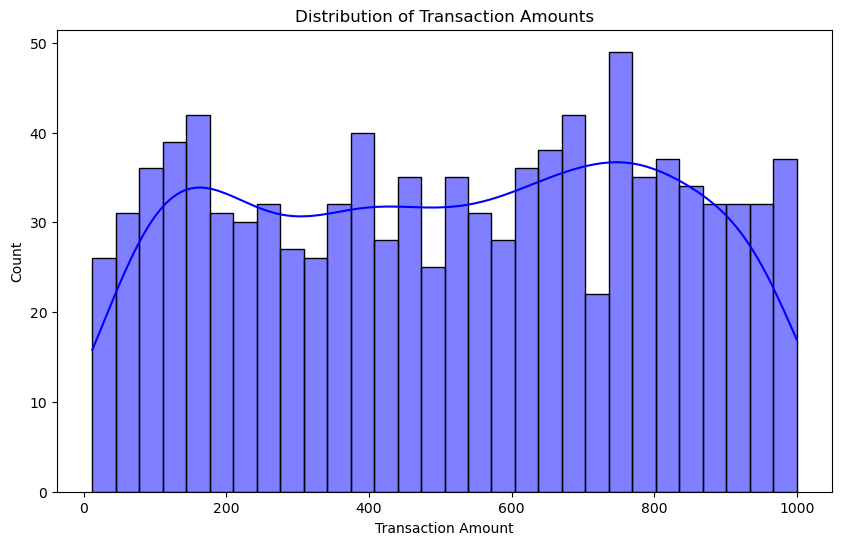

In [124]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TransactionAmount'], kde=True, bins=30, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.show()

#### Calculating Recency:

In [126]:
# Assume the last transaction date as the reference
current_date = df['PurchaseDate'].max()  
df['Recency'] = (current_date - df['PurchaseDate']).dt.days
df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60
1,2188,2023-04-11,463.70,Product A,176819,London,60
2,4608,2023-04-11,80.28,Product A,340062,New York,60
3,2559,2023-04-11,221.29,Product A,239145,London,60
4,9482,2023-04-11,739.56,Product A,194545,Paris,60
...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,0
996,6669,2023-06-10,941.50,Product C,987025,New York,0
997,8836,2023-06-10,545.36,Product C,512842,London,0
998,1440,2023-06-10,729.94,Product B,559753,Paris,0


#### Calculating Frequency

In [128]:
frequency_data = df.groupby('CustomerID')['OrderID'].count().reset_index()
frequency_data.rename(columns={'OrderID': 'Frequency'}, inplace=True)
df = df.merge(frequency_data, on = 'CustomerID', how = 'left')
df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60,1
1,2188,2023-04-11,463.70,Product A,176819,London,60,1
2,4608,2023-04-11,80.28,Product A,340062,New York,60,1
3,2559,2023-04-11,221.29,Product A,239145,London,60,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,60,1
...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,0,1
996,6669,2023-06-10,941.50,Product C,987025,New York,0,1
997,8836,2023-06-10,545.36,Product C,512842,London,0,1
998,1440,2023-06-10,729.94,Product B,559753,Paris,0,1


#### Calculating Monetary

In [130]:
monetary_data = df.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
monetary_data.rename(columns={'TransactionAmount': 'MonetaryValue'}, inplace=True)
df = df.merge(monetary_data, on = 'CustomerID', how = 'left')
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,60,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,60,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,60,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,60,1,739.56


#### Calculating RFM Scores

In [132]:
recency_scores = [5, 4, 3, 2, 1]
frequency_scores = [1, 2, 3, 4, 5]
monetary_scores = [1, 2, 3, 4 ,5]

df['RecencyScore'] = pd.cut(df['Recency'], bins = 5, labels= recency_scores)
df['FrequencyScore'] = pd.cut(df['Frequency'], bins = 5, labels= frequency_scores)
df['MonetaryScore'] = pd.cut(df['MonetaryValue'], bins= 5, labels= monetary_scores)

df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60,1,943.31,1,1,2
1,2188,2023-04-11,463.70,Product A,176819,London,60,1,463.70,1,1,1
2,4608,2023-04-11,80.28,Product A,340062,New York,60,1,80.28,1,1,1
3,2559,2023-04-11,221.29,Product A,239145,London,60,1,221.29,1,1,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,60,1,739.56,1,1,2


In [133]:
df['RecencyScore'] = df['RecencyScore'].astype(int)
df['FrequencyScore'] = df['FrequencyScore'].astype(int)
df['MonetaryScore'] = df['MonetaryScore'].astype(int)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
 6   Recency             1000 non-null   int64         
 7   Frequency           1000 non-null   int64         
 8   MonetaryValue       1000 non-null   float64       
 9   RecencyScore        1000 non-null   int32         
 10  FrequencyScore      1000 non-null   int32         
 11  MonetaryScore       1000 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(4), object(2)
memory usage: 82.2+ KB


#### RFM Value Segmentation:

In [136]:
df['RFM_Score'] = df['RecencyScore'] + df['FrequencyScore'] + df['MonetaryScore']

segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
df['Value Segment'] = pd.qcut(df['RFM_Score'], q= 3, labels= segment_labels)
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60,1,943.31,1,1,2,4,Low-Value
1,2188,2023-04-11,463.70,Product A,176819,London,60,1,463.70,1,1,1,3,Low-Value
2,4608,2023-04-11,80.28,Product A,340062,New York,60,1,80.28,1,1,1,3,Low-Value
3,2559,2023-04-11,221.29,Product A,239145,London,60,1,221.29,1,1,1,3,Low-Value
4,9482,2023-04-11,739.56,Product A,194545,Paris,60,1,739.56,1,1,2,4,Low-Value


In [137]:
segment_counts = df['Value Segment'].value_counts().reset_index()
segment_counts.columns = ['Value Segment', 'Count']
segment_counts.head()

,Value Segment,Count
0,Low-Value,435
1,Mid-Value,386
2,High-Value,179


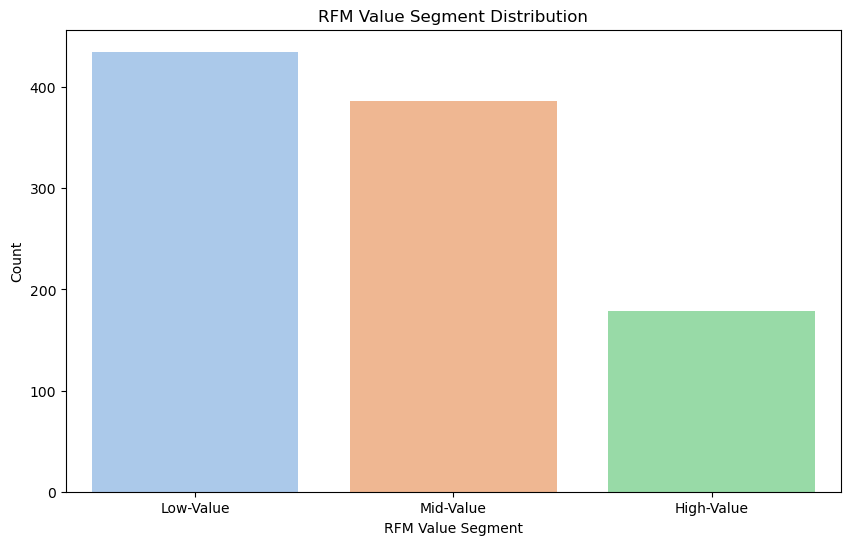

In [175]:
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_counts, x='Value Segment', y='Count',hue ='Value Segment', palette='pastel')
plt.title('RFM Value Segment Distribution')
plt.xlabel('RFM Value Segment')
plt.ylabel('Count')
plt.show()

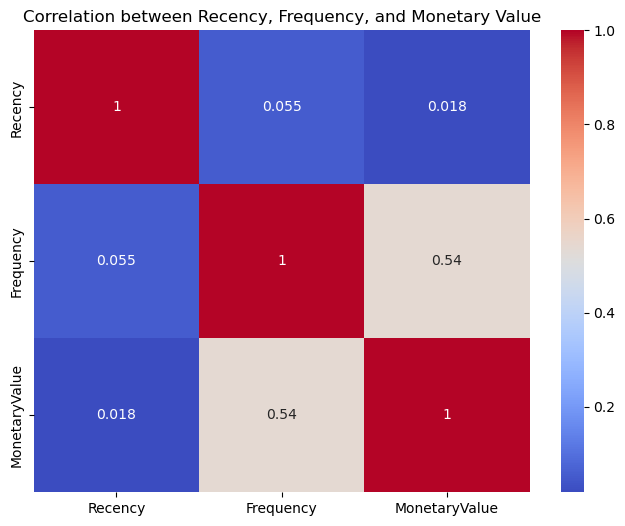

In [139]:
# Correlation heatmap
corr = df[['Recency', 'Frequency', 'MonetaryValue']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Recency, Frequency, and Monetary Value')
plt.show()

#### RFM Customer Segmentation:

In [141]:
df['RFM Customer Segments'] = ''

df.loc[df['RFM_Score'] >= 9, 'RFM Customer Segments'] = 'Champions'
df.loc[(df['RFM_Score'] >= 6) & (df['RFM_Score'] < 9), 'RFM Customer Segments'] = 'Potential Loyalists'
df.loc[(df['RFM_Score'] >= 5) & (df['RFM_Score'] < 6), 'RFM Customer Segments'] = 'At Risk Customers'
df.loc[(df['RFM_Score'] >= 4) & (df['RFM_Score'] < 5), 'RFM Customer Segments'] = 'Cannot Lose'
df.loc[(df['RFM_Score'] >= 3) & (df['RFM_Score'] < 4), 'RFM Customer Segments'] = 'Lost'

df[['CustomerID', 'RFM Customer Segments']]

,CustomerID,RFM Customer Segments
0,8814,Cannot Lose
1,2188,Lost
2,4608,Lost
3,2559,Lost
4,9482,Cannot Lose
...,...,...
995,2970,Potential Loyalists
996,6669,Potential Loyalists
997,8836,Potential Loyalists
998,1440,Potential Loyalists


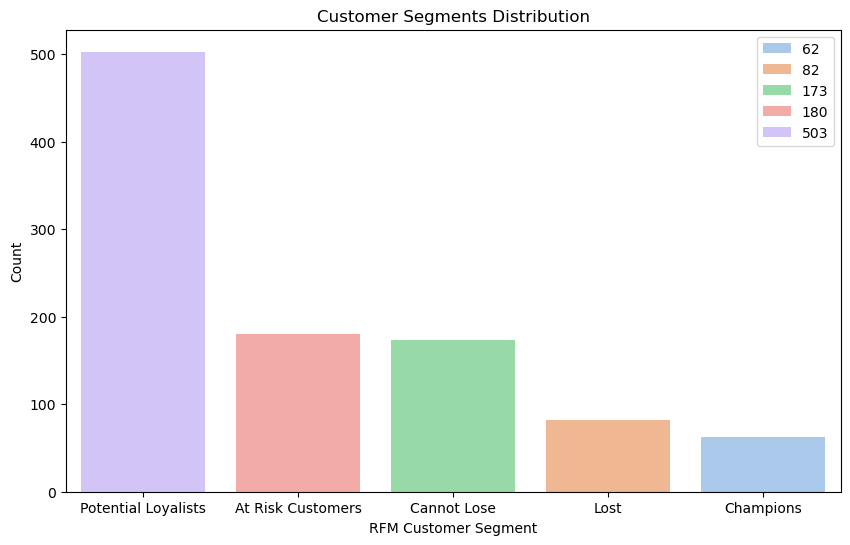

In [173]:
customer_segment_counts = df['RFM Customer Segments'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=customer_segment_counts.index, y=customer_segment_counts.values ,hue =customer_segment_counts.values , palette='pastel')
plt.title('Customer Segments Distribution')
plt.xlabel('RFM Customer Segment')
plt.ylabel('Count')
plt.show()

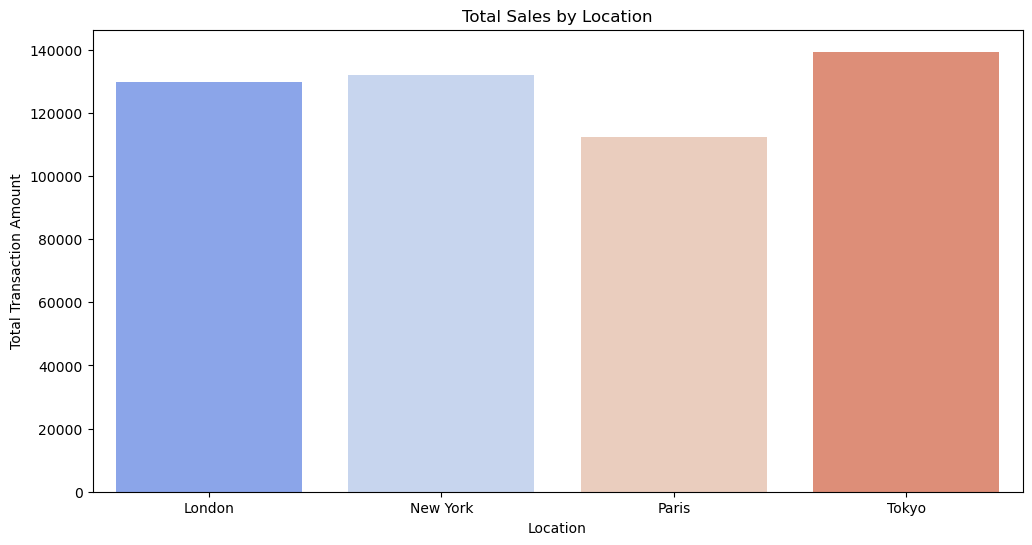

In [169]:
location_sales = df.groupby('Location')['TransactionAmount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=location_sales, x='Location', y='TransactionAmount',hue = 'Location' ,palette='coolwarm')
plt.title('Total Sales by Location')
plt.xlabel('Location')
plt.ylabel('Total Transaction Amount')
plt.show()